# Customer Segmentation
<img src="https://dotcom.nlcdn.com/wp-content/uploads/2019/10/Market-Segmentation_Featured-1140x768@2x-80-min.jpg" />

## Contents
1. Abstract
2. Dataset
3. Goal
4. Importing Required libraries
5. Data Cleaning and Data Processing
6. Data Visualization and Encoding Data
7. Prediction Models
    - Splitting the dataset into 80:20 ratio
    - Deploying the models
        - Logistic Regression
        - Linear SVC
        - KNN
        - XGBoost Classifier
        - RandomForest Classifier
8. Comparing the accuracy of the models
9. Conclusion

## Abstract
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

Content In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.
The object of this project is to help the manager to predict the right group of the new customers.

## Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset :  https://www.kaggle.com/vetrirah/customer.

## Goal
The goal of this project is to develop a model which can segment the customers into different categories based on the characteristics provided in dataset.

## Importing Required Libraries and Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = df = pd.concat(map(pd.read_csv, ['Train.csv', 'Test.csv']), ignore_index=True)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Data Cleaning and Data Processing

As ID column is a randomly generated value and it is not one of the parameters that will help in customer segmentation, we can drop the ID column.

In [3]:
df.shape

(10695, 11)

In [4]:
df.drop(['ID'], inplace=True,axis=1)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df.isnull().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

Since there are null values present in "Ever_Married", "Graduated", "Profession", "Work_experience", "Family_size", "Var_1" columns. we will fill the null values with maximum occuring value corresponding to each column

### Ever_Married

In [6]:
# Ever_married
df.Ever_Married.value_counts()

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

In [7]:
df['Ever_Married'].fillna('Yes',inplace=True)

### Graduated

In [8]:
#Graduated 
df.Graduated.value_counts()


Yes    6570
No     4023
Name: Graduated, dtype: int64

In [9]:
df['Graduated'].fillna('Yes',inplace=True)

### Profession

In [10]:
#Profession
df.Profession.value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

In [11]:
# The above table specifies that customers are mainly artist and healthcare
df.Profession.fillna('Artist',inplace=True)

### Work Experience

In [12]:
#Work_Experience
df.Work_Experience.value_counts()

1.0     3127
0.0     3087
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
11.0      64
10.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [13]:
#The missing value of work_experience customer, can be treated as zero experience
df.Work_Experience.fillna(0,inplace=True)

### Family Size

In [14]:
#Family_Size
df.Family_Size.value_counts()

2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

In [15]:
#Filling the column with the previous appeared value
df.Family_Size.fillna(method='ffill',inplace=True)

### Var_1

In [16]:
#Var_1
df.Var_1.value_counts()

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64

In [17]:
df.Var_1.fillna('Cat_6',inplace=True)

### Segmentation

In [18]:
df.Segmentation.value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [19]:
df.Segmentation.fillna('D',inplace=True)

In [20]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### Converting labels to Categorical Values

In [21]:
label=pd.Categorical(df.Segmentation,categories=['A','B','C','D']).codes
df.drop(['Segmentation'],axis=1,inplace=True)
label

array([3, 0, 1, ..., 3, 3, 3], dtype=int8)

## Data Visualization and Encoding Data 

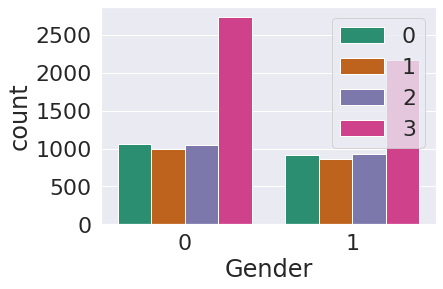

In [207]:
sns.countplot(df.Gender,hue=label,palette="Dark2")
sns.set(font_scale=0)

In [22]:
# As there is no null value in the gender column we could easily assign male as 0 and female as 1
df.Gender=pd.Categorical(df.Gender,categories=['Male','Female'],ordered=True).codes

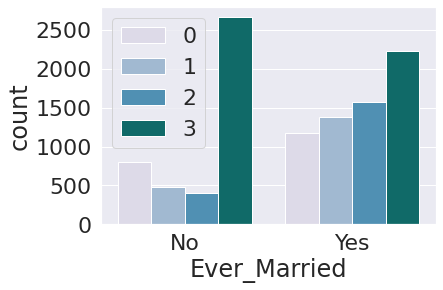

In [213]:
sns.countplot(df.Ever_Married,hue=label,palette='PuBuGn')
sns.set(font_scale=0)

In [23]:
df.Ever_Married=pd.Categorical(df.Ever_Married,categories=['No','Yes'],ordered=True).codes


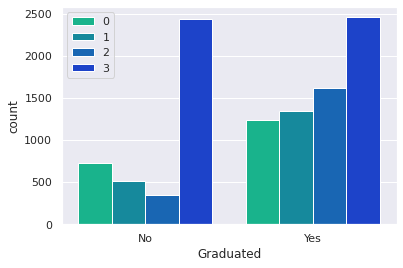

In [138]:
sns.countplot(df.Graduated,hue=label,palette='winter_r')
plt.show()

In [24]:
df.Graduated=pd.Categorical(df.Graduated,categories=['No','Yes'],ordered=True).codes

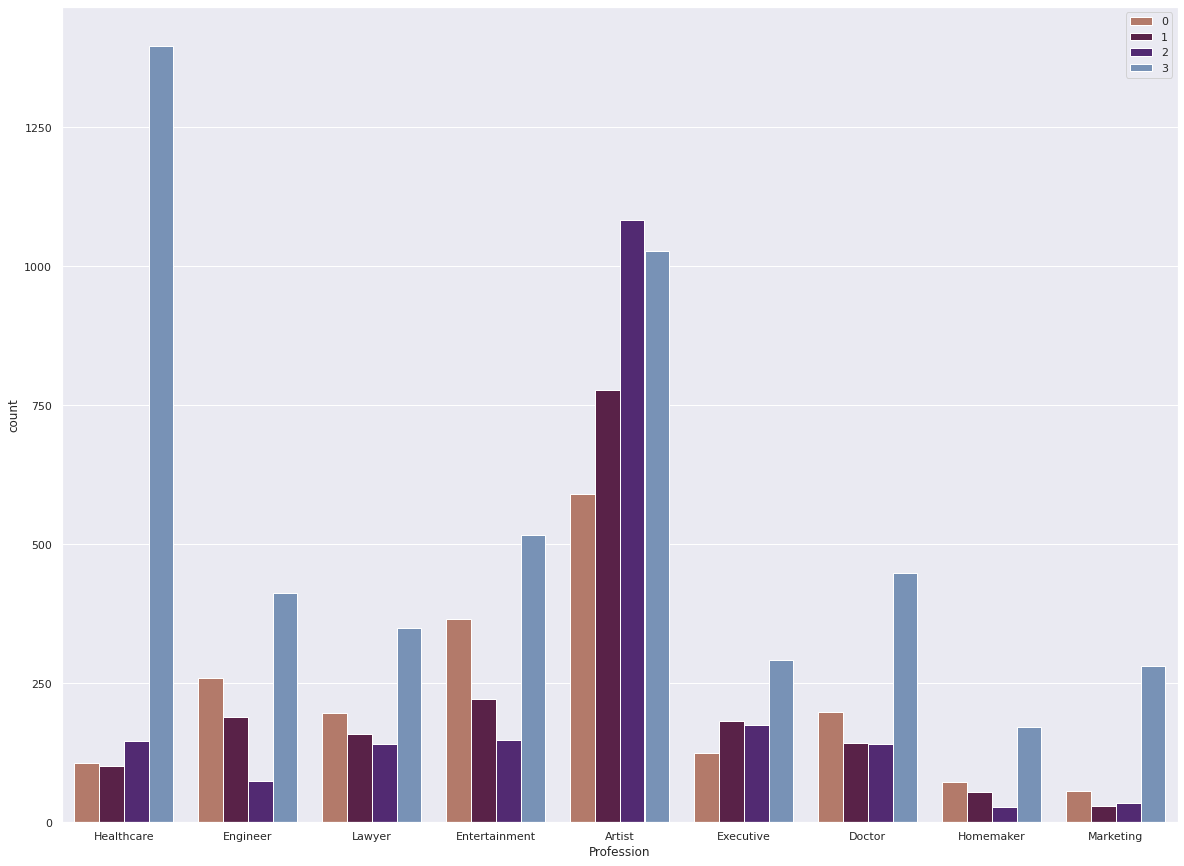

In [139]:
plt.figure(figsize=(20,15))
sns.countplot(df.Profession,hue=label,palette='twilight_r')
sns.set(font_scale = 5)
plt.show()

The above graph signifies that Artist and Executive are generally categorised as category C and Healthcare worker and other are generally categorised as category D.

In [25]:
profession=pd.get_dummies(df.Profession)
df.drop(['Profession'],axis=1,inplace=True)

In [26]:
profession

,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10690,0,0,0,0,0,1,0,0,0
10691,0,1,0,0,0,0,0,0,0
10692,0,0,0,1,0,0,0,0,0
10693,0,0,0,0,1,0,0,0,0


In [27]:
df = df.join(profession)

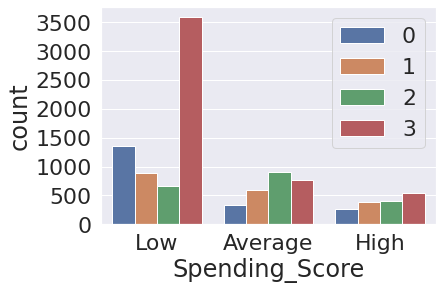

In [145]:
sns.countplot(df.Spending_Score,hue=label)
sns.set(font_scale=0)

The above graph informs about that low budget people are mostly been classified in category D

In [28]:
df.Spending_Score=pd.Categorical(df.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

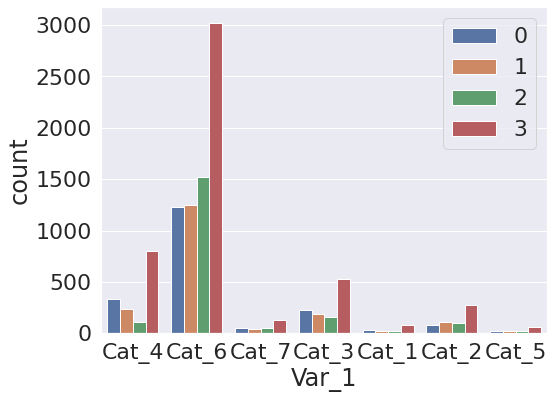

In [150]:
plt.figure(figsize=(8,6))
sns.countplot(df.Var_1,hue=label)
sns.set(font_scale=0)

In [29]:
df.Var_1=pd.Categorical(df.Var_1).codes


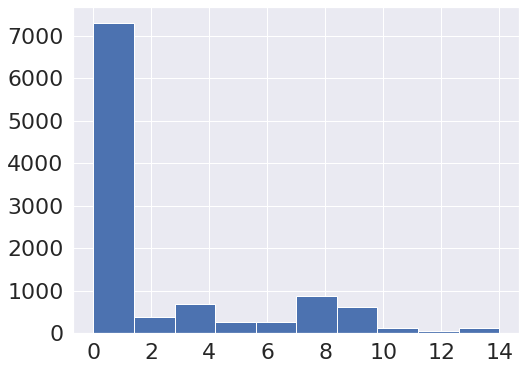

In [156]:
plt.figure(figsize=(8,6))
plt.hist(df.Work_Experience)
sns.set(font_scale=0)

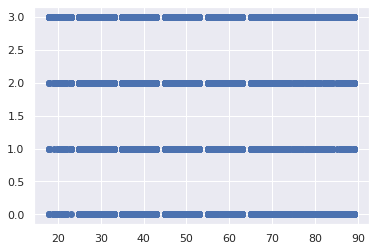

In [160]:
plt.scatter(df.Age,label)
sns.set(font_scale=0)

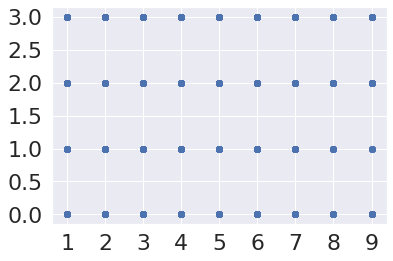

In [100]:
plt.scatter(df.Family_Size,label)
sns.set(font_scale=0)

In the above graphs of Age,work experience and family size are screwed. so we could use MinMaxScaler to normalize group of data between the range of 0 to 1.

#### Attaching the label column which signifies the category of customer to main dataframe

In [30]:
correlation_data=pd.DataFrame(label,columns=['label'])
df = df.join(correlation_data)
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,label
0,0,0,22,0,1.0,0,4.0,3,0,0,0,0,0,1,0,0,0,3
1,1,1,38,1,0.0,1,3.0,3,0,0,1,0,0,0,0,0,0,0
2,1,1,67,1,1.0,0,1.0,5,0,0,1,0,0,0,0,0,0,1
3,0,1,67,1,0.0,2,2.0,5,0,0,0,0,0,0,0,1,0,1
4,1,1,40,1,0.0,2,6.0,5,0,0,0,1,0,0,0,0,0,0


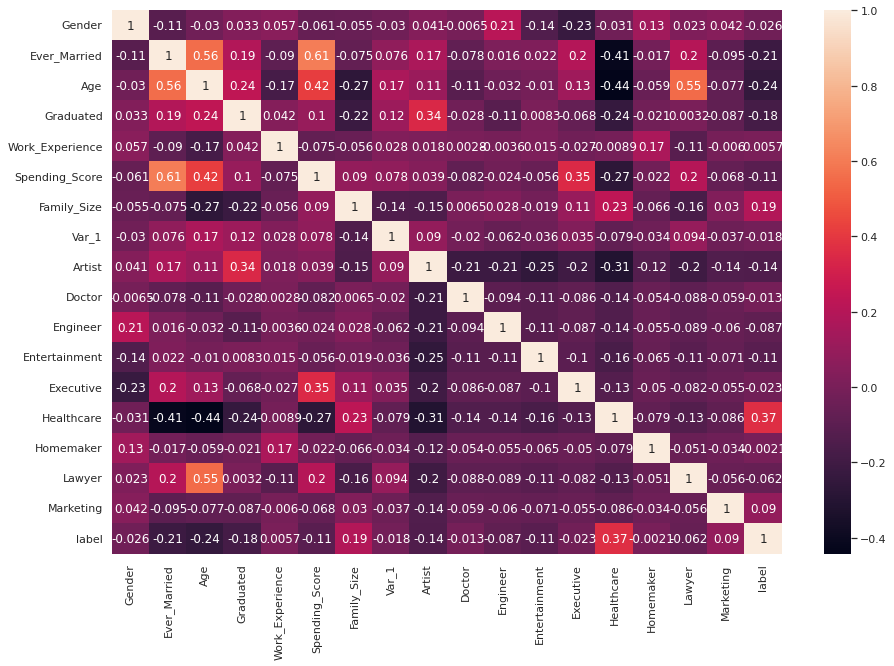

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


## Prediction Models
### Splitting the dataset into 80:20 ratio

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('label',axis=1)
#axis = 0 means drop row
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(8556, 17)
(2139, 17)


### Deploying the Models

#### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
classifier1=LogisticRegression(tol=0.01,max_iter=1000)
classifier1.fit(X_train,y_train)

LogisticRegression(max_iter=1000, tol=0.01)

In [33]:
print("To evaluate the performace of train data on the model \n",classification_report(y_train,classifier1.predict(X_train)))
print("To evaluate the performace of validation data on the model \n",classification_report(y_test,classifier1.predict(X_test)))

To evaluate the performace of train data on the model 
               precision    recall  f1-score   support

           0       0.33      0.02      0.03      1565
           1       0.34      0.04      0.08      1503
           2       0.45      0.49      0.47      1589
           3       0.52      0.87      0.65      3899

    accuracy                           0.50      8556
   macro avg       0.41      0.35      0.31      8556
weighted avg       0.44      0.50      0.40      8556

To evaluate the performace of validation data on the model 
               precision    recall  f1-score   support

           0       0.43      0.02      0.04       407
           1       0.21      0.03      0.05       355
           2       0.43      0.49      0.46       381
           3       0.53      0.88      0.66       996

    accuracy                           0.50      2139
   macro avg       0.40      0.35      0.30      2139
weighted avg       0.44      0.50      0.41      2139



#### Linear SVC

In [36]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
classifier2=OneVsRestClassifier(SVC(kernel='linear'))
classifier2.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

In [37]:
print("To evaluate the performace of train data on the model \n",classification_report(y_train,classifier2.predict(X_train)))
print("To evaluate the performace of validation data on the model \n",classification_report(y_test,classifier2.predict(X_test)))

To evaluate the performace of train data on the model 
               precision    recall  f1-score   support

           0       0.24      0.18      0.20      1565
           1       0.27      0.17      0.21      1503
           2       0.41      0.32      0.36      1589
           3       0.57      0.75      0.65      3899

    accuracy                           0.47      8556
   macro avg       0.37      0.36      0.36      8556
weighted avg       0.43      0.47      0.44      8556

To evaluate the performace of validation data on the model 
               precision    recall  f1-score   support

           0       0.24      0.16      0.19       407
           1       0.27      0.19      0.22       355
           2       0.36      0.28      0.32       381
           3       0.57      0.76      0.65       996

    accuracy                           0.47      2139
   macro avg       0.36      0.35      0.35      2139
weighted avg       0.42      0.47      0.43      2139



#### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))
classifier3.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=3))

In [47]:
print("To evaluate the performace of train data on the model \n",classification_report(y_train,classifier3.predict(X_train)))
print("To evaluate the performace of validation data on the model \n",classification_report(y_test,classifier3.predict(X_test)))

To evaluate the performace of train data on the model 
               precision    recall  f1-score   support

           0       0.73      0.43      0.54      1565
           1       0.70      0.40      0.51      1503
           2       0.64      0.59      0.61      1589
           3       0.65      0.88      0.75      3899

    accuracy                           0.66      8556
   macro avg       0.68      0.57      0.60      8556
weighted avg       0.67      0.66      0.64      8556

To evaluate the performace of validation data on the model 
               precision    recall  f1-score   support

           0       0.30      0.17      0.22       407
           1       0.26      0.15      0.19       355
           2       0.34      0.33      0.33       381
           3       0.53      0.72      0.61       996

    accuracy                           0.45      2139
   macro avg       0.36      0.34      0.34      2139
weighted avg       0.41      0.45      0.42      2139



#### XGBoost Classifier

In [48]:
import xgboost as xgb
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
classifier4 = xgb.XGBClassifier(**params)   
classifier4.fit(X_train,y_train)     

XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5,
              objective='multi:softprob')

In [49]:
print("To evaluate the performace of train data on the model \n",classification_report(y_train,classifier4.predict(X_train)))
print("To evaluate the performace of validation data on the model \n",classification_report(y_test,classifier4.predict(X_test)))

To evaluate the performace of train data on the model 
               precision    recall  f1-score   support

           0       0.59      0.13      0.21      1565
           1       0.53      0.13      0.21      1503
           2       0.50      0.55      0.52      1589
           3       0.55      0.85      0.67      3899

    accuracy                           0.54      8556
   macro avg       0.54      0.42      0.40      8556
weighted avg       0.54      0.54      0.48      8556

To evaluate the performace of validation data on the model 
               precision    recall  f1-score   support

           0       0.42      0.10      0.16       407
           1       0.31      0.06      0.10       355
           2       0.47      0.52      0.49       381
           3       0.54      0.84      0.66       996

    accuracy                           0.51      2139
   macro avg       0.44      0.38      0.35      2139
weighted avg       0.47      0.51      0.44      2139



#### RandomForest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators=100)
classifier5.fit(X_train,y_train) 

RandomForestClassifier()

In [51]:
print("To evaluate the performace of train data on the model \n",classification_report(y_train,classifier5.predict(X_train)))
print("To evaluate the performace of validation data on the model \n",classification_report(y_test,classifier5.predict(X_test)))

To evaluate the performace of train data on the model 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1565
           1       0.91      0.89      0.90      1503
           2       0.90      0.92      0.91      1589
           3       0.95      0.95      0.95      3899

    accuracy                           0.93      8556
   macro avg       0.93      0.93      0.93      8556
weighted avg       0.93      0.93      0.93      8556

To evaluate the performace of validation data on the model 
               precision    recall  f1-score   support

           0       0.29      0.24      0.26       407
           1       0.21      0.18      0.20       355
           2       0.38      0.36      0.37       381
           3       0.55      0.63      0.59       996

    accuracy                           0.43      2139
   macro avg       0.36      0.35      0.35      2139
weighted avg       0.42      0.43      0.42      2139



### Comparing the Accuracy of the Models

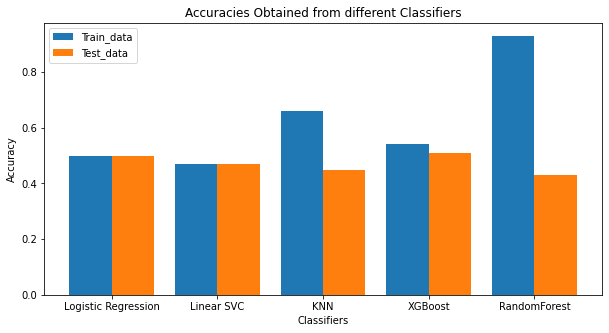

In [64]:
X = ['Logistic Regression','Linear SVC','KNN','XGBoost','RandomForest']
train = [0.5,0.47,0.66,0.54,0.93]
test = [0.5,0.47,0.45,0.51,0.43]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,5)) 
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train_data')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test_data')
  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracies Obtained from different Classifiers")
plt.legend()
plt.show()

### Conclusion

Though accuracy is not the only metrics to judge a model. We can conclude the following observations about each classifier on the given dataset as follows:


1.   Logistic Regression - The dataset performs equally on both train and test data and has an accuracy around 50% each. It has highest accuracy rate on test data.
2.   Linear SVC - This classifier also has an equal performance on both train and test data and has an accuracy around 47% for each. This classifier performs poorly on train data.
3. KNN - This classifier has an accuracy around 66% on train data but performs poorly on test data with an accuracy around 45%.
4. XGBoost - This classifier performs slightly better on train data than test data with an accuracy around 54% on train data and 51%  on test data.
5. RandomForest - This classifer has highest accuracy on train data, but fails to maintain the accuracy with test data. It has an accuracy around 93% with train data and 43% with test data.
